In Python, the Scipy and Scikit-Learn libraries have defined functions for hierarchical clustering. The below examples use these library functions to illustrate hierarchical clustering in Python.

First, we'll import NumPy, matplotlib, and seaborn (for plot styling):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

Next, we'll define a small sample data set:

In [2]:
np.random.seed(0)
np.random.rand(3)

X1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])


Let's graph this data set as a scatter plot:



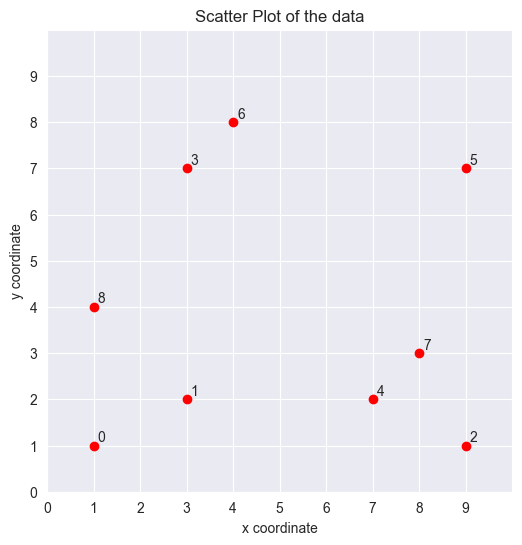

In [3]:
plt.figure(figsize=(6, 6))

plt.scatter(X1[:,0], X1[:,1], c='r')

# Create numbered labels for each point
for i in range(X1.shape[0]):
    plt.annotate(str(i), xy=(X1[i,0], X1[i,1]), xytext=(3, 3), textcoords='offset points')

plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter Plot of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid()

plt.show()

We'll now use this data set to perform hierarchical clustering.

Hierarchical Clustering using Scipy
The Scipy library has the linkage function for hierarchical (agglomerative) clustering.

The linkage function has several methods available for calculating the distance between clusters: single, average, weighted, centroid, median, and ward. We will compare these methods below. For more details on the linkage function, see the docs.

To draw the dendrogram, we'll use the dendrogram function. Again, for more details of the dendrogram function, see the docs.

First, we will import the required functions, and then we can form linkages with the various methods:

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X1, method='single', metric='euclidean')
Z2 = linkage(X1, method='complete', metric='euclidean')
Z3 = linkage(X1, method='average', metric='euclidean')
Z4 = linkage(X1, method='ward', metric='euclidean')



Now, by passing the dendrogram function to matplotlib, we can view a plot of these linkages:

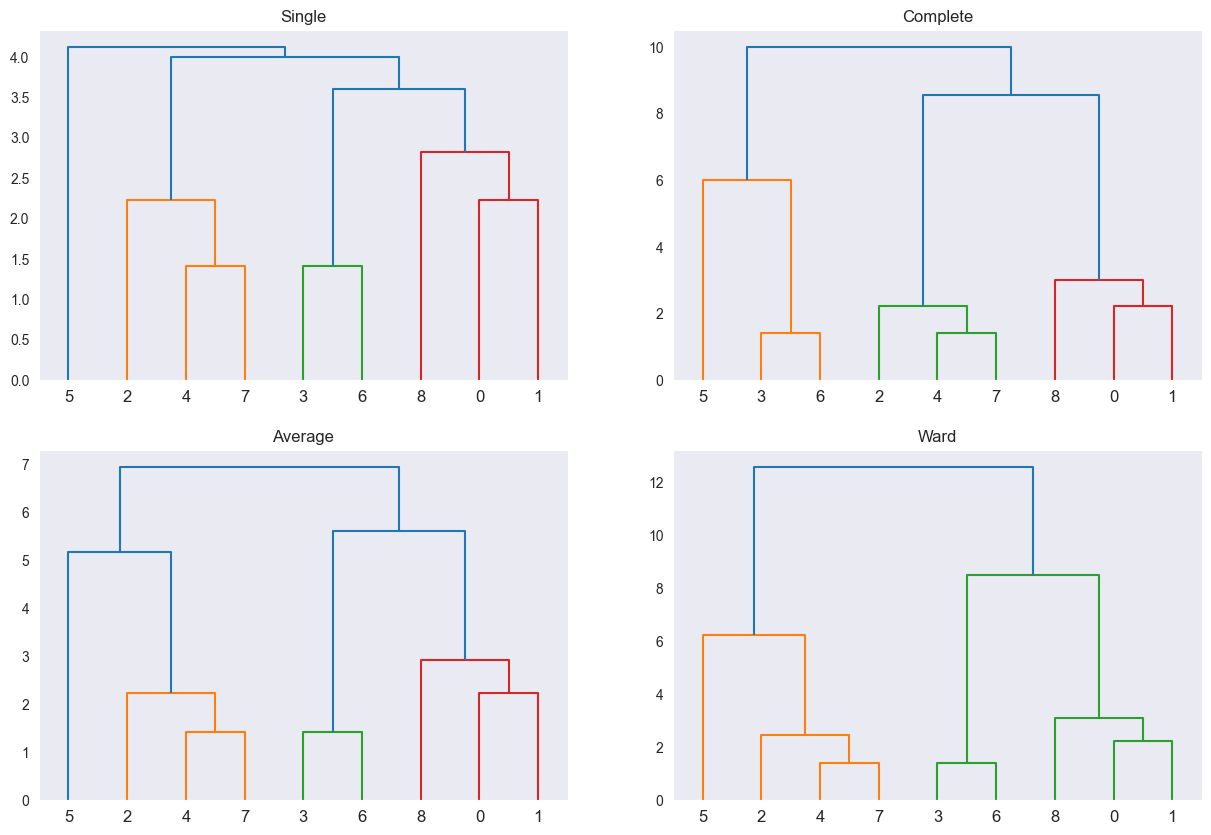

In [5]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1),  dendrogram(Z1),plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

Notice that each distance method produces different linkages for the same data.

Finally, let's use the fcluster function to find the clusters for the Ward linkage:

In [6]:
from scipy.cluster.hierarchy import fcluster

f1 = fcluster(Z4, 2, criterion='maxclust') # criterion='maxclust' indicates that the clustering should be formed by finding a threshold such that there are no more than 2 clusters in the data.

print(f"Clusters: {f1}")

Clusters: [2 2 1 2 1 1 2 1 2]


# The Scikit-Learn library has its own function for agglomerative hierarchical clustering: AgglomerativeClustering.

Options for calculating the distance between clusters include ward, complete, average, and single. For more specific information, you can find this class in the relevant docs

Using sklearn is slightly different than scipy. We need to import the AgglomerativveClustering class, then instantiate it with the number of desired clusters and the distance (linkage) function to use. Then, we use fit_predict to train and predict the clusters using the X1 data set:

In [7]:
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z1.fit_predict(X1)

print(Z1.labels_)

[0 0 1 0 1 1 0 1 0]


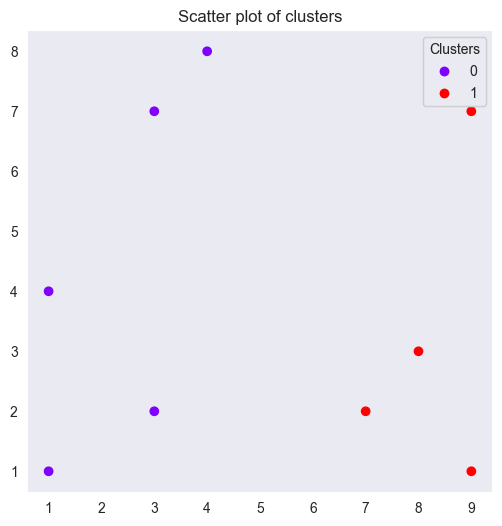

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X1[:,0], X1[:,1], c=Z1.labels_, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()